In [ ]:
# Download the dataset from the original paper
# !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
# !tar xzvf food-101.tar.gz


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, InputLayer, MaxPooling2D, Dropout
from keras.losses import SparseCategoricalCrossentropy
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Plot loss function and accuracy over each epoch
def plot_results(history):
  fig, ax = plt.subplots(1, 2, figsize=(15,5))
  ax[0].set_title('loss')
  ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
  ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
  ax[1].set_title('accuracy')
  ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
  ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
  ax[0].legend()
  ax[1].legend()

In [ ]:
#compute class distribution
def class_distribution(labels, categories):
  dist = dict()
  for c in categories:
    dist[c] = 0
  for l in labels:
    dist[categories[l]] += 1 
  plt.figure( figsize = ( 20, 5 ) )
  plt.bar( list( dist.keys() ), dist.values() )
  plt.xticks( rotation=90 )
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


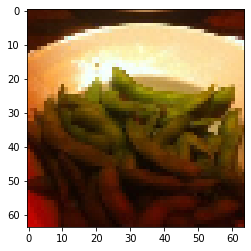

b'edamame'


In [ ]:
drive_path = '/content/drive/My Drive/PatternRecognitionProject/data/'
file_train = drive_path + 'food_c101_n10099_r64x64x3.h5'
file_test = drive_path + 'food_test_c101_n1000_r64x64x3.h5'

file1 = h5py.File(file_train, 'r')
file2 = h5py.File(file_test, 'r')

category_names = file1['category_names']

x_train = file1['images']
x_train = np.asarray(x_train)
x_train = x_train.astype('float32') / 255.
x_test = file2['images']
x_test = np.asarray(x_test)
x_test = x_test.astype('float32') / 255.


y_train = file1['category']
y_train = np.where(y_train[...] == True) [1]
y_train = y_train.astype('uint8')
y_test = file2['category']
y_test = np.where(y_test[...] == True) [1]
y_test = y_test.astype('uint8')

#ensure data loaded properly
plt.imshow(x_train[0])
plt.show()
print( category_names[y_train[0]])

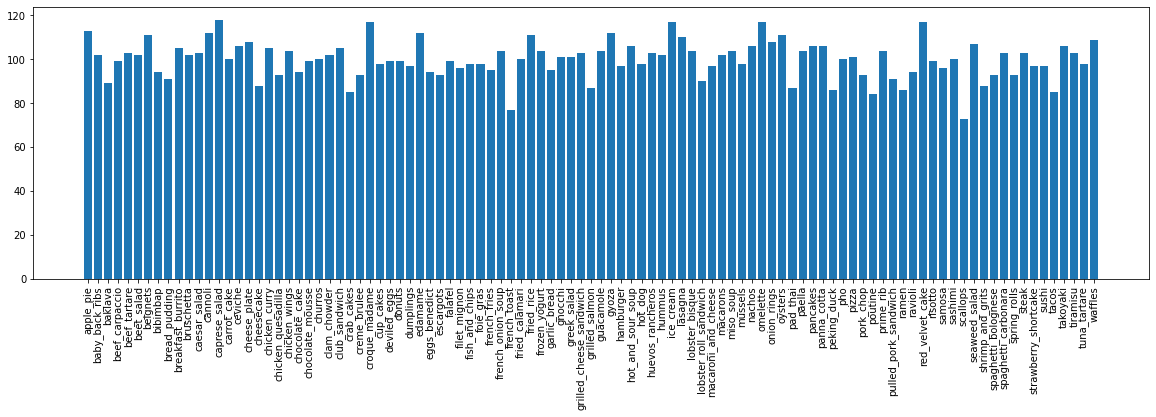

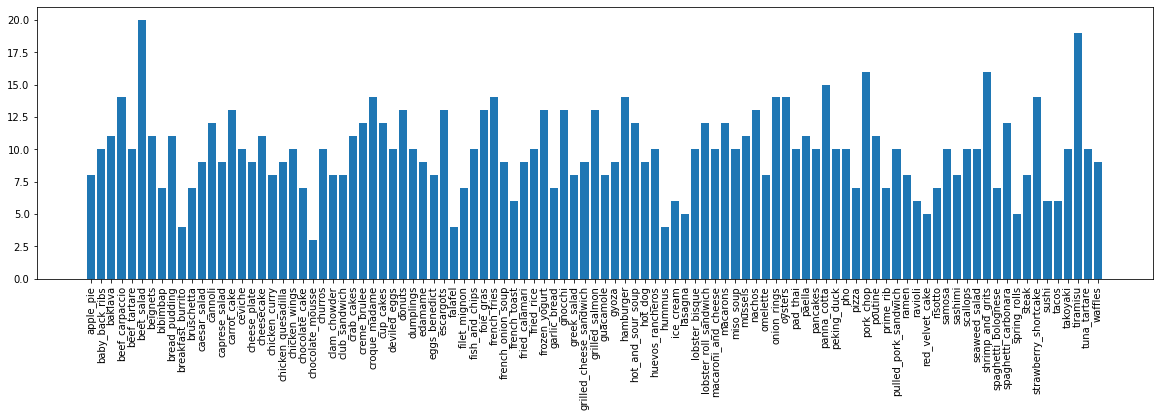

In [ ]:
class_distribution( y_train, category_names )
class_distribution( y_test, category_names )

In [ ]:
# LeNet-5 Convolutional Neural Network
LeNet5 = keras.Sequential(name='LeNet-5')
LeNet5.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
LeNet5.add(keras.layers.AveragePooling2D())
LeNet5.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
LeNet5.add(keras.layers.AveragePooling2D())
LeNet5.add(keras.layers.Flatten())
LeNet5.add(keras.layers.Dense(units=120, activation='relu'))
LeNet5.add(keras.layers.Dense(units=84, activation='relu'))
LeNet5.add(keras.layers.Dense(units=101, activation = 'softmax'))

LeNet5.summary()
LeNet5.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_6 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_7 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_13 (Dense)             (None, 84)                1016

In [ ]:
x_train_downsampled = tf.image.rgb_to_grayscale(tf.image.resize(x_train, (32,32)))
x_test_downsampled = tf.image.rgb_to_grayscale(tf.image.resize(x_test, (32,32)))

In [ ]:
history = LeNet5.fit(x_train_downsampled, y_train, epochs=150, verbose=1, validation_data=(x_test_downsampled, y_test))

Epoch 1/150
316/316 [==============================] - 2s 5ms/step - loss: 4.6087 - accuracy: 0.0121 - val_loss: 4.5513 - val_accuracy: 0.0200
Epoch 2/150
316/316 [==============================] - 1s 5ms/step - loss: 4.5420 - accuracy: 0.0168 - val_loss: 4.5003 - val_accuracy: 0.0200
Epoch 3/150
316/316 [==============================] - 1s 5ms/step - loss: 4.5159 - accuracy: 0.0235 - val_loss: 4.4892 - val_accuracy: 0.0240
Epoch 4/150
316/316 [==============================] - 1s 5ms/step - loss: 4.4849 - accuracy: 0.0267 - val_loss: 4.4579 - val_accuracy: 0.0270
Epoch 5/150
316/316 [==============================] - 1s 5ms/step - loss: 4.4529 - accuracy: 0.0321 - val_loss: 4.4353 - val_accuracy: 0.0300
Epoch 6/150
316/316 [==============================] - 1s 5ms/step - loss: 4.4048 - accuracy: 0.0400 - val_loss: 4.4209 - val_accuracy: 0.0370
Epoch 7/150
316/316 [==============================] - 1s 5ms/step - loss: 4.3592 - accuracy: 0.0436 - val_loss: 4.4151 - val_accuracy: 0.0390

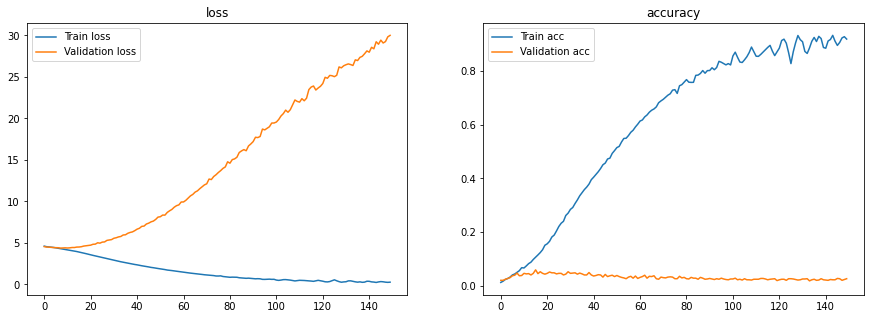

In [ ]:
# Plot loss function and accuracy over each epoch
plot_results(history)
plt.show()

In [ ]:
results = LeNet5.evaluate(x_test_downsampled, y_test)
print("test loss, test acc:", results)

32/32 [==============================] - 0s 4ms/step - loss: 30.0045 - accuracy: 0.0260
test loss, test acc: [30.004539489746094, 0.026000000536441803]


In [ ]:
# AlexNet
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(101, activation='softmax')
], name='AlexNet')

AlexNet.summary()

AlexNet.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])


Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8851

In [ ]:
x_train_upsampled = tf.image.resize(x_train, (227,227))
x_test_upsampled = tf.image.resize(x_test, (227,227))

In [ ]:
history2 = AlexNet.fit(x_train_upsampled, y_train, epochs=150, verbose=1, validation_data=(x_test_upsampled, y_test))

Epoch 1/150
316/316 [==============================] - 15s 46ms/step - loss: 5.1206 - accuracy: 0.0251 - val_loss: 4.9307 - val_accuracy: 0.0080
Epoch 2/150
316/316 [==============================] - 14s 44ms/step - loss: 4.5382 - accuracy: 0.0390 - val_loss: 4.3829 - val_accuracy: 0.0530
Epoch 3/150
316/316 [==============================] - 14s 45ms/step - loss: 4.4349 - accuracy: 0.0458 - val_loss: 4.3052 - val_accuracy: 0.0500
Epoch 4/150
316/316 [==============================] - 14s 45ms/step - loss: 4.3476 - accuracy: 0.0582 - val_loss: 4.2241 - val_accuracy: 0.0740
Epoch 5/150
316/316 [==============================] - 14s 45ms/step - loss: 4.2851 - accuracy: 0.0639 - val_loss: 4.4511 - val_accuracy: 0.0430
Epoch 6/150
316/316 [==============================] - 14s 45ms/step - loss: 4.2261 - accuracy: 0.0736 - val_loss: 4.1783 - val_accuracy: 0.0710
Epoch 7/150
316/316 [==============================] - 14s 45ms/step - loss: 4.1516 - accuracy: 0.0817 - val_loss: 4.1781 - val_ac

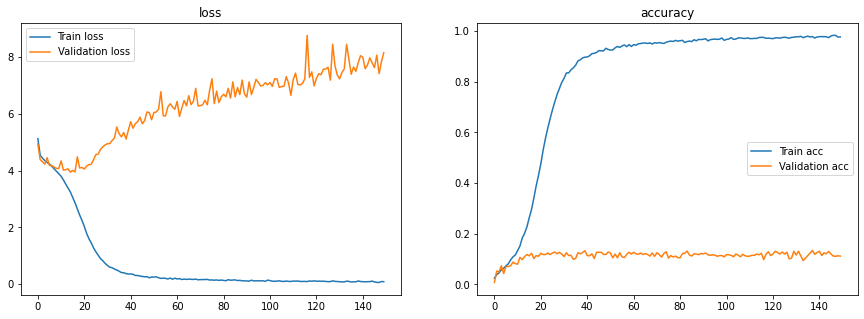

In [ ]:
# Plot loss function and accuracy over each epoch
plot_results(history2)
plt.show()

In [ ]:
results2 = AlexNet.evaluate(x_test_upsampled, y_test)
print("test loss, test acc:", results2)

32/32 [==============================] - 1s 18ms/step - loss: 8.1438 - accuracy: 0.1120
test loss, test acc: [8.143832206726074, 0.1120000034570694]


In [ ]:
VGG16_model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(101, activation='softmax')
], name='VGG16')

VGG16_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])
VGG16_model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       295168

In [ ]:
x_train_upsampled = tf.image.resize(x_train, (224,224))
x_test_upsampled = tf.image.resize(x_test, (224,224))

In [ ]:
history3 = VGG16_model.fit(x_train_upsampled, y_train, epochs=150, verbose=1, validation_data=(x_test_upsampled, y_test))

Epoch 1/150
316/316 [==============================] - 136s 431ms/step - loss: 4.6138 - accuracy: 0.0094 - val_loss: 4.5994 - val_accuracy: 0.0060
Epoch 2/150
316/316 [==============================] - 145s 458ms/step - loss: 4.5371 - accuracy: 0.0198 - val_loss: 4.5007 - val_accuracy: 0.0210
Epoch 4/150
316/316 [==============================] - 145s 458ms/step - loss: 4.5170 - accuracy: 0.0214 - val_loss: 4.4963 - val_accuracy: 0.0240
Epoch 5/150
316/316 [==============================] - 145s 459ms/step - loss: 4.4158 - accuracy: 0.0356 - val_loss: 4.3788 - val_accuracy: 0.0400
Epoch 7/150
316/316 [==============================] - 146s 462ms/step - loss: 4.3745 - accuracy: 0.0440 - val_loss: 4.3482 - val_accuracy: 0.0450
Epoch 8/150
316/316 [==============================] - 145s 460ms/step - loss: 4.3377 - accuracy: 0.0498 - val_loss: 4.3152 - val_accuracy: 0.0450
Epoch 9/150
316/316 [==============================] - 146s 462ms/step - loss: 4.2979 - accuracy: 0.0523 - val_loss: 4

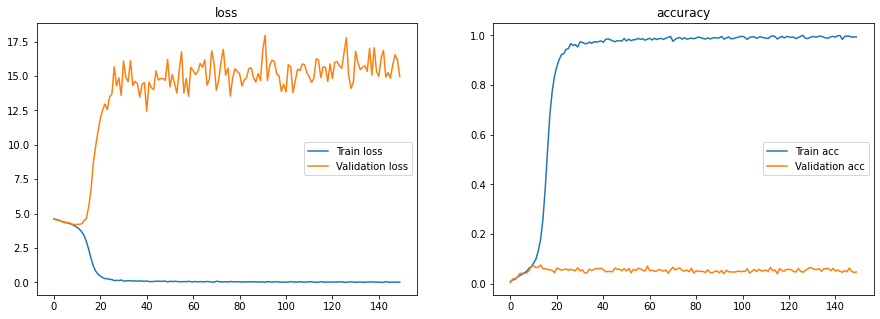

In [ ]:
plot_results(history3)
plt.show()

In [ ]:
results3 = VGG16_model.evaluate(x_test_upsampled, y_test)
print("test loss, test acc:", results3)